# Questions

## Increase in surface salinity in the arctic, is there some kind of trend in obersved data? What about models?

## How well does models represent the changes in salinity, and can they be used as a good indication for the future?

## How does sea surface salinity affect the vertical ocean circulation? And is this influence impactfull?

## What can we say about the sea surface salinity in the future, and how will this affect the vertical circulation in the arctic?


In [2]:
import functions as f
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import s3fs
import cftime
import intake
import numpy as np
from joblib import Parallel, delayed
%load_ext autoreload
%autoreload 2

## Satellite data

In [3]:
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))
path='escience2022/Antoine/ESA_SMOS_Arctic_Sea_Surface_Salinity/'
model_path='escience2022/Ada/daily/'
year = 2015
index = 30*5
sat_files = f.read_satellite_data(num_years=10, path=path)
dat = xr.open_dataset(s3.open(sat_files[year][index])).squeeze()
dat['y'] = dat['y']*1000
dat['x'] = dat['x']*1000
sss = dat['sss']

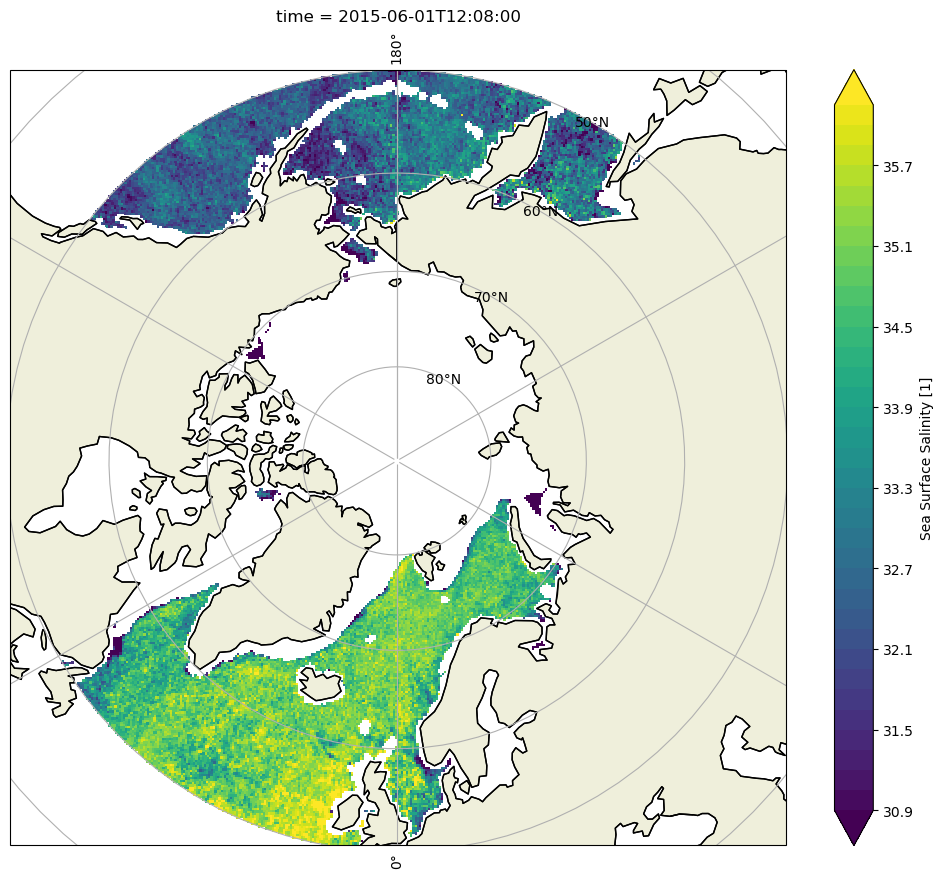

In [15]:
f.plot_sss_sat(dat['sss'], levels=50)

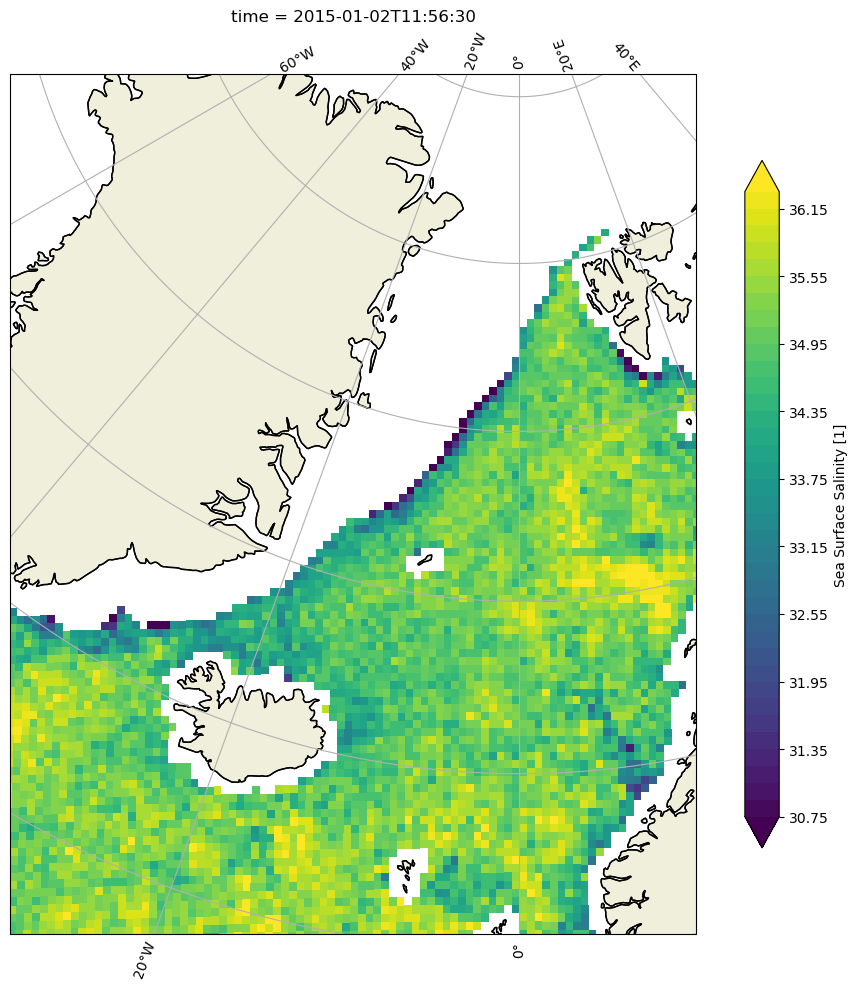

In [6]:
f.plot_sss_sat(sss, levels=50, extent=[-30,10,85,60], vmin=10, vmax=40)

In [7]:
import time

years = [2011,2012,2013,2014,2015,2016,2017,2018,2019]
start = time.time()
tmp = []
for year in years:
    tmp.append(xr.concat(Parallel(n_jobs=16)(delayed(f.create_xr)(file) for file in sat_files[year]), dim='time'))
print(time.time()-start)

225.62046885490417


In [19]:
sat_data = xr.concat(tmp, dim='time')#, dim='Year')

In [9]:
sat_data

<xarray.Dataset>
Dimensions:  (time: 3285, y: 432, x: 432)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-02T21:32:30 ... 2019-12-30T12:33:30
  * y        (y) float32 -5.388e+06 -5.362e+06 ... 5.362e+06 5.388e+06
  * x        (x) float32 -5.388e+06 -5.362e+06 ... 5.362e+06 5.388e+06
    lat      (y, x) float32 16.62 16.82 17.02 17.22 ... 17.22 17.02 16.82 16.62
    lon      (y, x) float32 -45.0 -44.87 -44.73 -44.6 ... 135.3 135.1 135.0
Data variables:
    crs      (time) int32 -2147483647 -2147483647 ... -2147483647 -2147483647
    sss      (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/48)
    title:                     Arctic Sea Surface Salinity L3 map
    institution:               Barcelona Expert Center (BEC), ICM-CSIC, Barce...
    institution_url:           http://bec.icm.csic.es
    summary:                   This dataset contains 9-day Level-3 Arctic sea...
    comment:                   These data were produced at BEC as part of the...
    source:                    SMOS L1B version 6.21
    ...                        ...
    sensor:                    SMOS/MIRAS
    spatial_resolution:        35km at nadir
    license:                   This product is distributed under Creative Com...
    license_url:               https://creativecommons.org/licenses/by/4.0/
    copyright:                 If this data is used for publication, the foll...
    doi:                       10.20350/digitalCSIC/12620

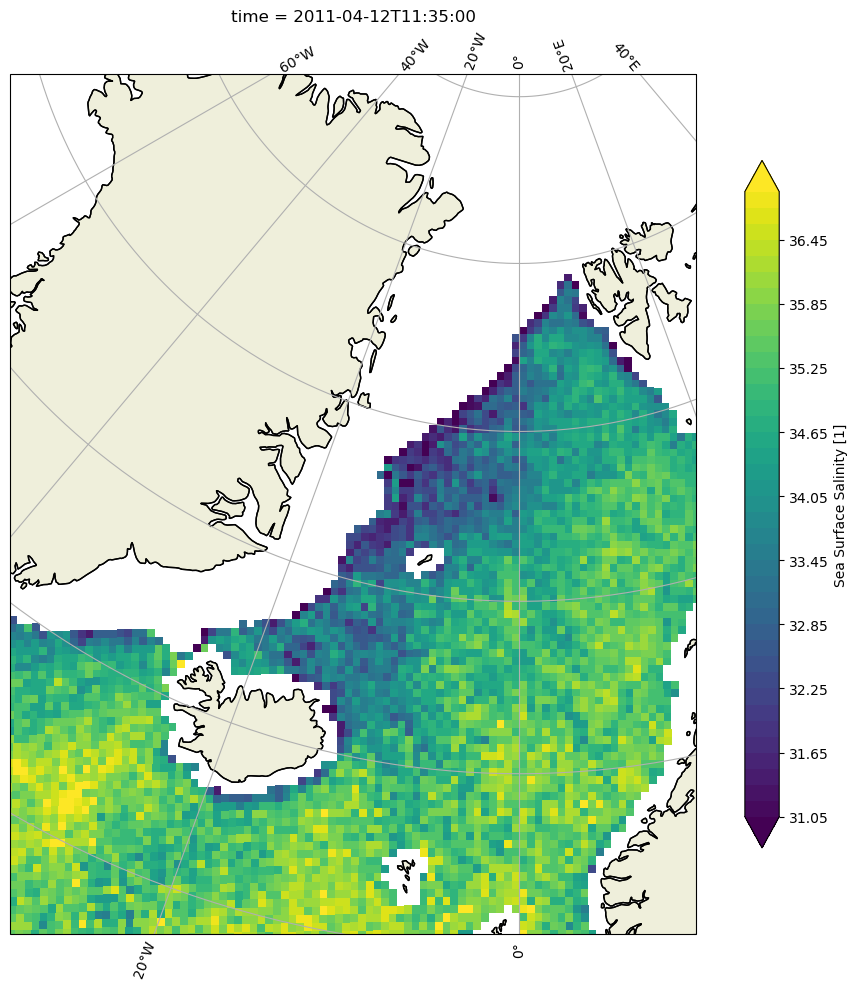

In [9]:
f.plot_sss_sat(sat_data['sss'][100], extent=[-30,10,85,60], levels=50, vmin=10, vmax=40)

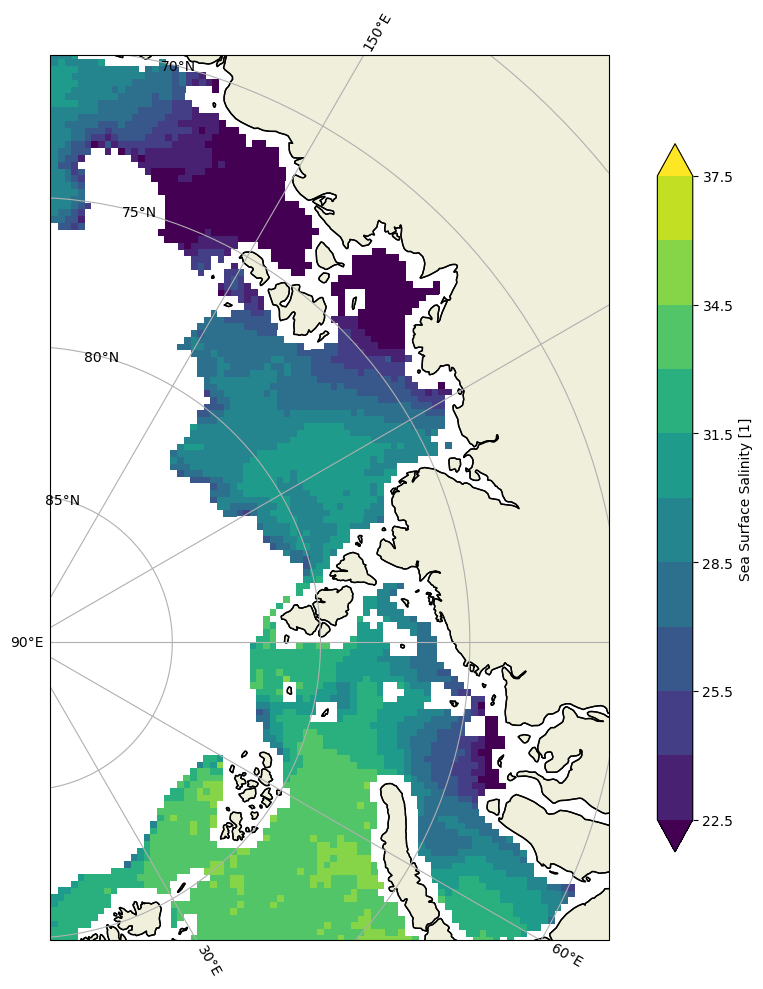

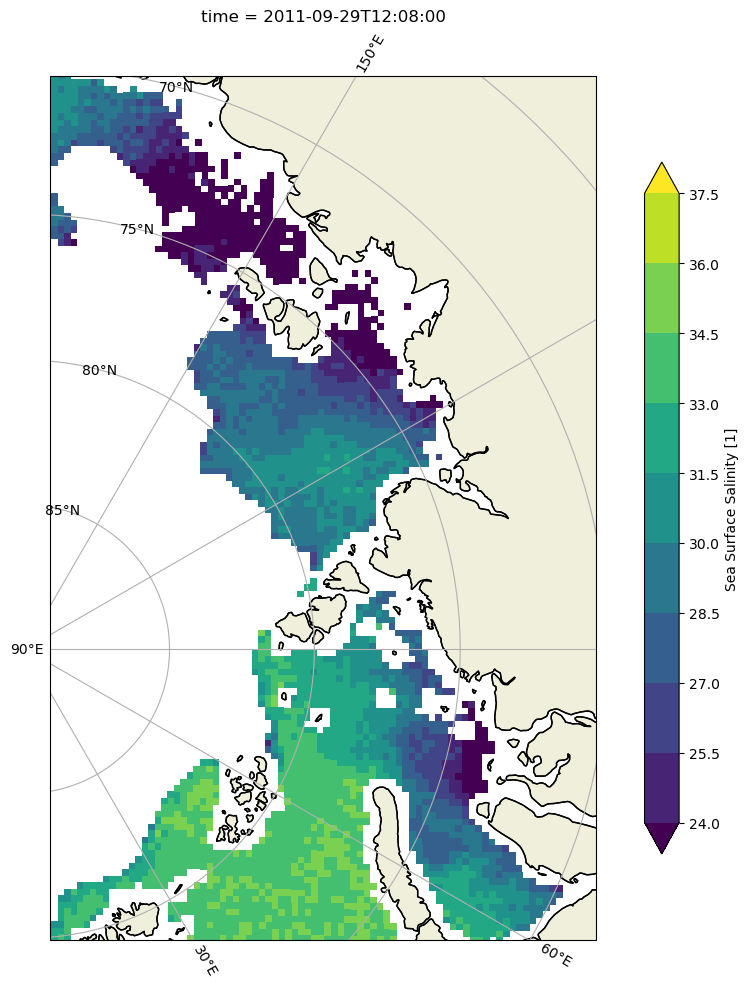

In [22]:
mlen = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

m = sat_data['sss'][250:280].mean('time', keep_attrs=True)
#monthly_mean = data['sss'][mlen[0]:mlen[1]].mean()
#monthly_mean
f.plot_sss_sat(m, extent = [60,170,85,70])
f.plot_sss_sat(sat_data['sss'][270], extent = [60,170,85,70])

In [25]:
mean = m.mean()

AttributeError: 'function' object has no attribute 'mean'

## ARGO data

In [8]:
argo_path = 's3://escience2022/Ada/ARGO/coriolis/6903571/6903571_prof.nc'

In [9]:
data = xr.open_dataset(s3.open(argo_path))

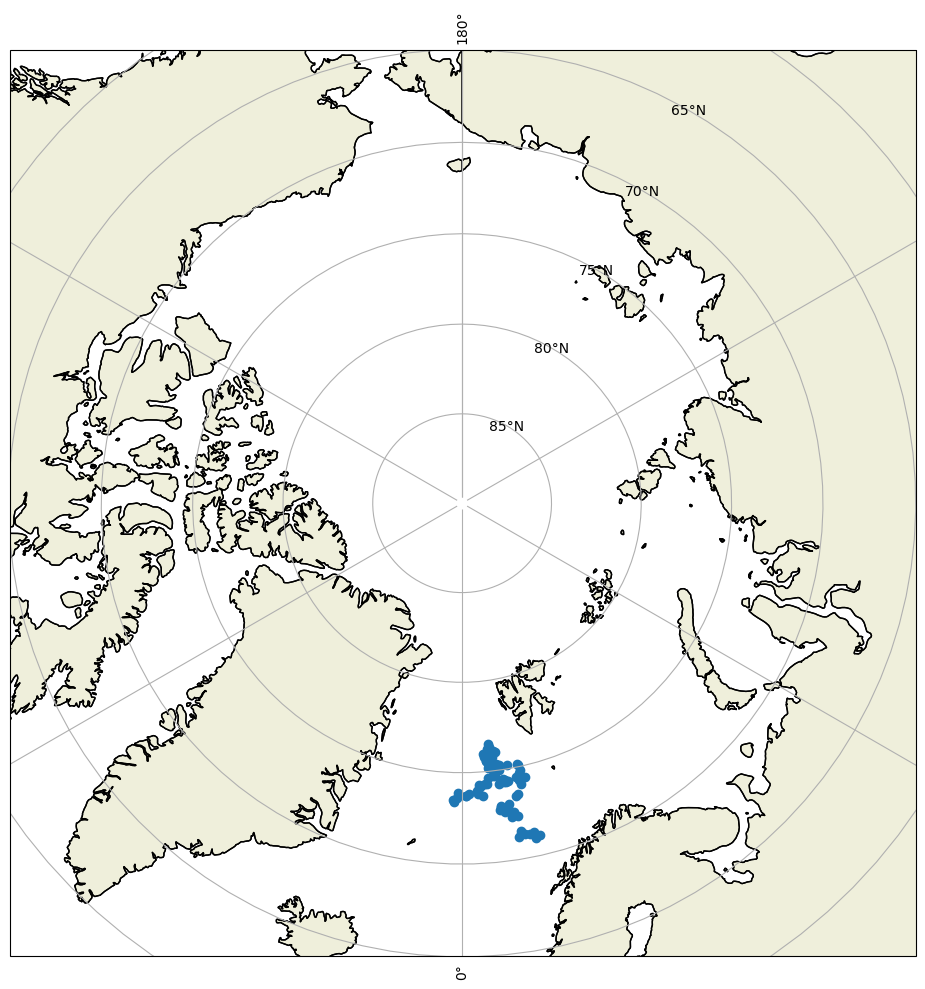

In [23]:

f.plot_argo_positions(data)